<a href="https://colab.research.google.com/github/xparisax/course-v3/blob/master/Copy_of_lesson2_sgd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [0]:
%matplotlib inline
from fastai.basics import *

In this part of the lecture we explain Stochastic Gradient Descent (SGD) which is an **optimization** method commonly used in neural networks. We will illustrate the concepts with concrete examples.

#  Linear Regression problem

The goal of linear regression is to fit a line to a set of points.

In [0]:
n=100

In [5]:
x = torch.ones(n,2) 
x[:,0].uniform_(-1.,1)
x[:5]

tensor([[-0.5682,  1.0000],
        [ 0.8575,  1.0000],
        [ 0.1189,  1.0000],
        [-0.5881,  1.0000],
        [ 0.4035,  1.0000]])

In [7]:
xx = torch.zeros_like(x)
xx[:, 0].uniform_(-1.,1.)
xx[:5]

tensor([[-0.8175,  0.0000],
        [-0.0238,  0.0000],
        [-0.7894,  0.0000],
        [-0.2491,  0.0000],
        [ 0.2382,  0.0000]])

In [17]:
a = tensor(4.,2); a #rank 1 -> vector

tensor([4., 2.])

In [12]:
tensor([2,3],[1,1])
tensor([[1,2],[2,3]])

tensor([[1, 2],
        [2, 3]])

In [0]:
y = x@a + torch.rand(n) # add noise

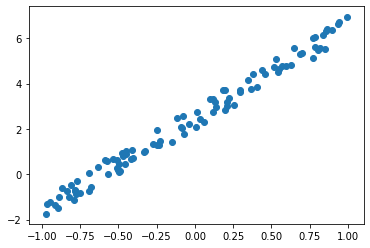

In [19]:
plt.scatter(x[:,0], y);

You want to find **parameters** (weights) `a` such that you minimize the *error* between the points and the line `x@a`. Note that here `a` is unknown. For a regression problem the most common *error function* or *loss function* is the **mean squared error**. **MSE**

In [0]:
def mse(y_hat, y): return ((y_hat-y)**2).mean()

Suppose we believe `a = (-1.0,1.0)` then we can compute `y_hat` which is our *prediction* and then compute our error.

In [0]:
a = tensor(-1.,1)

In [22]:
y_hat = x@a
mse(y_hat, y)

tensor(10.4825)

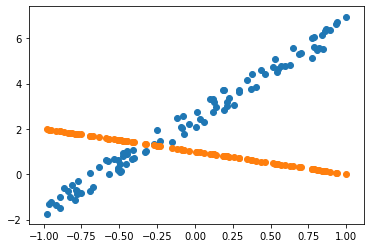

In [24]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat)

So far we have specified the *model* (linear regression) and the *evaluation criteria* (or *loss function*). Now we need to handle *optimization*; that is, how do we find the best values for `a`? How do we find the best *fitting* linear regression.

# Gradient Descent

We would like to find the values of `a` that minimize `mse_loss`.

**Gradient descent** is an algorithm that minimizes functions. Given a function defined by a set of parameters, gradient descent starts with an initial set of parameter values and iteratively moves toward a set of parameter values that minimize the function. This iterative minimization is achieved by taking steps in the negative direction of the function gradient.

Here is gradient descent implemented in [PyTorch](http://pytorch.org/).

In [25]:
a = nn.Parameter(a); a

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [0]:
def update():
    y_hat = x@a
    loss = mse(y, y_hat)
    if t % 10 == 0: print(loss)
    loss.backward() #cal derivitive
    with torch.no_grad():
        a.sub_(lr * a.grad)
        a.grad.zero_()

In [27]:
lr = 1e-1
for t in range(100): update()

tensor(10.4825, grad_fn=<MeanBackward0>)
tensor(2.3648, grad_fn=<MeanBackward0>)
tensor(0.6529, grad_fn=<MeanBackward0>)
tensor(0.2280, grad_fn=<MeanBackward0>)
tensor(0.1217, grad_fn=<MeanBackward0>)
tensor(0.0951, grad_fn=<MeanBackward0>)
tensor(0.0885, grad_fn=<MeanBackward0>)
tensor(0.0868, grad_fn=<MeanBackward0>)
tensor(0.0864, grad_fn=<MeanBackward0>)
tensor(0.0863, grad_fn=<MeanBackward0>)


In [36]:
y_hat =x@a
y_hat[:4]

tensor([0.1842, 6.0319, 3.0025, 0.1025], grad_fn=<SliceBackward>)

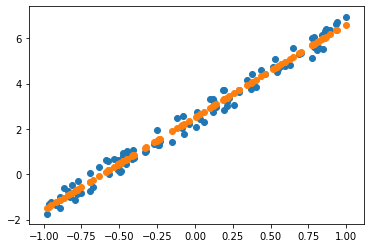

In [37]:
y_hat = y_hat.detach().numpy()
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat);

## Animate it!

In [0]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [41]:
a = nn.Parameter(tensor(-1.,1))
y_hat =x@a
y_hat=y_hat.detach().numpy()
fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
line, = plt.plot(x[:,0], y_hat)
plt.close()

def animate(i):
    update()
    y_hat =x@a
    y_hat=y_hat.detach().numpy()
    line.set_ydata(y_hat)
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)

In practice, we don't calculate on the whole file at once, but we use *mini-batches*.

## Vocab

- Learning rate
- Epoch
- Minibatch
- SGD
- Model / Architecture
- Parameters
- Loss function

For classification problems, we use *cross entropy loss*, also known as *negative log likelihood loss*. This penalizes incorrect confident predictions, and correct unconfident predictions.